In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("/content/Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
data.shape

(30, 2)

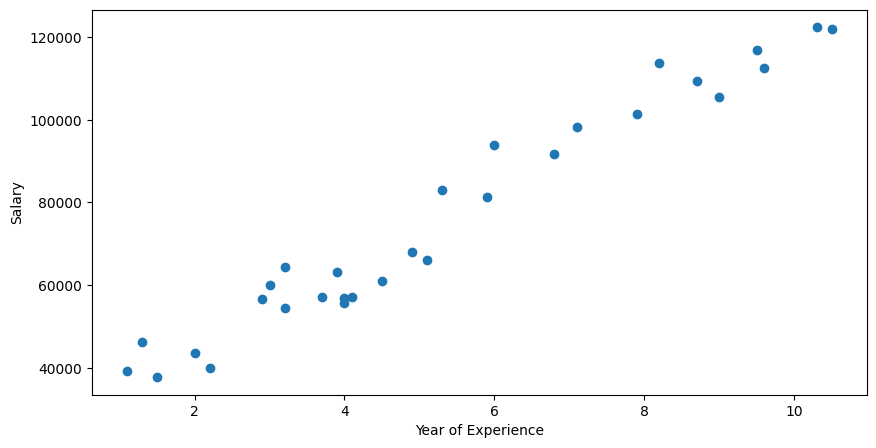

In [4]:
plt.figure(figsize=(10,5))
plt.scatter(data.YearsExperience,data.Salary)
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.show()

In [5]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [6]:
#Stats model

In [7]:
model = smf.ols("Salary~YearsExperience",data=data).fit()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.14e-20
Time:                        15:03:42   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [10]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [11]:
model.predict()

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

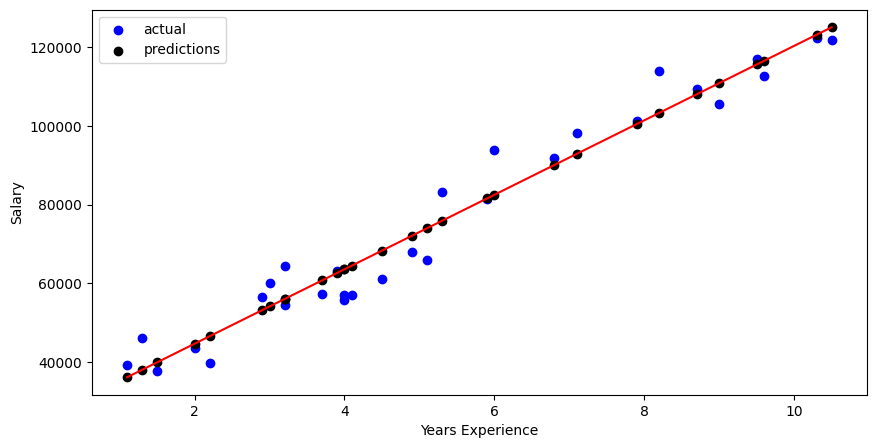

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(data.YearsExperience,data.Salary,color="blue",label="actual")
plt.scatter(data.YearsExperience,model.predict(),color="black",label="predictions")
plt.plot(data.YearsExperience,model.predict(),color="red")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.legend(loc="best")
plt.show()

In [13]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data=data).fit()

In [14]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 16 May 2023   Prob (F-statistic):           3.25e-13
Time:                        15:03:42   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [16]:
model2.resid

0     20547.151661
1     20629.764808
2      6348.448095
3       467.737694
4     -7034.138875
5     -1494.050079
6       638.157559
7     -7685.943929
8      2314.056071
9    -10833.718504
10    -6941.105863
11   -15392.552842
12   -14229.552842
13   -15107.628149
14   -14855.422577
15   -11484.295729
16   -15016.791737
17      481.170118
18    -5596.066704
19     6298.867023
20     -982.502137
21     3800.485304
22     2496.628610
23    13494.081316
24     6711.079249
25     1486.286888
26    10679.131565
27     5920.185400
28    12819.992753
29    11520.545855
dtype: float64

In [17]:
model2.predict()

array([ 18795.84833932,  25575.23519175,  31382.55190541,  43057.2623059 ,
        46925.13887516,  58136.05007933,  59511.84244125,  62130.943929  ,
        62130.943929  ,  68022.71850448,  70159.10586295,  71186.55284173,
        71186.55284173,  72188.62814857,  75966.42257661,  79422.29572936,
        81045.79173698,  82606.82988239,  86959.06670394,  87641.13297709,
        92720.50213746,  94472.51469629,  98805.37138951, 100317.91868441,
       102719.92075053, 104095.71311245, 106289.86843506, 106714.81460019,
       109571.00724698, 110351.45414519])

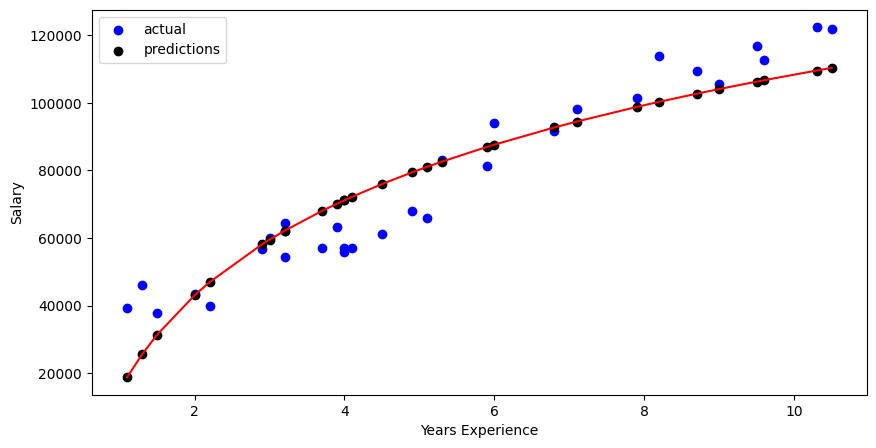

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(data.YearsExperience,data.Salary,color="blue",label="actual")
plt.scatter(data.YearsExperience,model2.predict(),color="black",label="predictions")
plt.plot(data.YearsExperience,model2.predict(),color="red")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.legend(loc="best")
plt.show()

In [19]:
model3 = smf.ols('np.log(Salary)~YearsExperience',data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 16 May 2023   Prob (F-statistic):           7.03e-18
Time:                        15:03:43   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model3.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [27]:
model3.resid

0    -0.065327
1     0.070353
2    -0.157344
3    -0.077217
4    -0.189492
5     0.073291
6     0.120836
7    -0.003905
8     0.164716
9    -0.017461
10    0.057676
11   -0.079792
12   -0.059162
13   -0.069532
14   -0.051493
15    0.004230
16   -0.049362
17    0.155353
18    0.059102
19    0.190292
20    0.066210
21    0.097387
22    0.027382
23    0.106188
24    0.004207
25   -0.069235
26   -0.029540
27   -0.079842
28   -0.084591
29   -0.113931
dtype: float64

In [28]:
model3.predict()

array([10.64540007, 10.67049065, 10.69558123, 10.75830768, 10.78339825,
       10.87121528, 10.88376056, 10.90885114, 10.90885114, 10.97157759,
       10.99666816, 11.00921345, 11.00921345, 11.02175874, 11.0719399 ,
       11.12212105, 11.14721163, 11.17230221, 11.24757394, 11.26011923,
       11.36048154, 11.39811741, 11.49847972, 11.53611559, 11.59884203,
       11.6364779 , 11.69920434, 11.71174963, 11.79956666, 11.82465723])

In [35]:
np.exp(model3.predict())

array([ 41998.95746835,  43066.06679373,  44160.28922813,  47019.02918883,
        48213.68847426,  52639.1424722 ,  53303.67538648,  54658.01493467,
        54658.01493467,  58196.33078806,  59674.98290303,  60428.33845625,
        60428.33845625,  61191.20460439,  64340.19929147,  67651.24614934,
        69370.12871194,  71132.68463508,  76693.63077985,  77661.83503955,
        85860.70420802,  89153.72539326,  98565.80959149, 102346.11051167,
       108971.54075808, 113150.93336398, 120475.81960119, 121996.74383626,
       133194.6213443 , 136578.82969363])

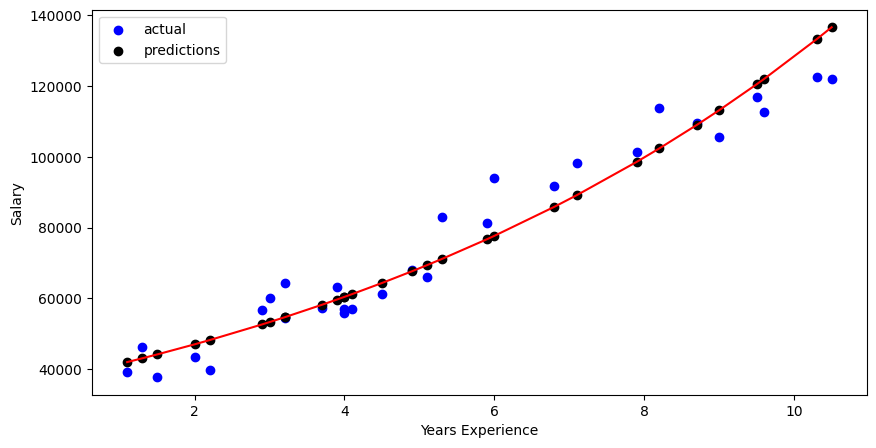

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(data.YearsExperience,data.Salary,color="blue",label="actual")
plt.scatter(data.YearsExperience,np.exp(model3.predict()),color="black",label="predictions")
plt.plot(data.YearsExperience,np.exp(model3.predict()),color="red")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.legend(loc="best")
plt.show()

In [20]:
data["yoe_sq"]=data.YearsExperience**2

In [24]:
data.head()

,YearsExperience,Salary,yoe_sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84


In [21]:
model_val = smf.ols("np.log(Salary)~YearsExperience+yoe_sq",data=data).fit()
model_val.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 16 May 2023   Prob (F-statistic):           3.95e-18
Time:                        15:03:43   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience     0.2024      0.027      7.601      0.000       0.148       0.257
yoe_sq             -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

array([ 41998.95746835,  43066.06679373,  44160.28922813,  47019.02918883,
        48213.68847426,  52639.1424722 ,  53303.67538648,  54658.01493467,
        54658.01493467,  58196.33078806,  59674.98290303,  60428.33845625,
        60428.33845625,  61191.20460439,  64340.19929147,  67651.24614934,
        69370.12871194,  71132.68463508,  76693.63077985,  77661.83503955,
        85860.70420802,  89153.72539326,  98565.80959149, 102346.11051167,
       108971.54075808, 113150.93336398, 120475.81960119, 121996.74383626,
       133194.6213443 , 136578.82969363])

In [30]:
model_val.params

Intercept          10.336852
YearsExperience     0.202382
yoe_sq             -0.006614
dtype: float64

In [31]:
model_val.resid

0     0.028604
1     0.152073
2    -0.087306
3    -0.034070
4    -0.156176
5     0.076368
6     0.120122
7    -0.011804
8     0.156817
9    -0.041007
10    0.028796
11   -0.111140
12   -0.090510
13   -0.103216
14   -0.093198
15   -0.043380
16   -0.099130
17    0.103956
18    0.005990
19    0.137358
20    0.019455
21    0.055132
22    0.002946
23    0.090617
24    0.006057
25   -0.055346
26    0.007059
27   -0.038304
28   -0.004776
29   -0.021989
dtype: float64

In [32]:
model_val.predict()

array([10.55146893, 10.58877076, 10.62554351, 10.71516063, 10.75008158,
       10.86813838, 10.88447456, 10.91675009, 10.91675009, 10.99512419,
       11.02554794, 11.0405614 , 11.0405614 , 11.0554426 , 11.11364467,
       11.16973041, 11.19697966, 11.22369982, 11.30068581, 11.31305386,
       11.40723651, 11.44037254, 11.52291536, 11.55168645, 11.59699285,
       11.62258944, 11.66260501, 11.67021131, 11.71975183, 11.73271583])

In [34]:
np.exp(model_val.predict())

array([ 38233.55968388,  39686.67474589,  41173.22746608,  45033.44097301,
        46633.83258946,  52477.42630569,  53341.74731911,  55091.46547732,
        55091.46547732,  59582.91752287,  61423.50989862,  62352.64702561,
        62352.64702561,  63287.46732525,  67080.23195657,  70949.98099952,
        72909.89629433,  74884.32157493,  80877.08489392,  81883.58814722,
        89970.44558736,  93001.65235899, 101003.99610859, 103952.19927506,
       108770.21862247, 111590.30365183, 116146.19844674, 117033.00980667,
       122976.9027602 , 124581.55401886])

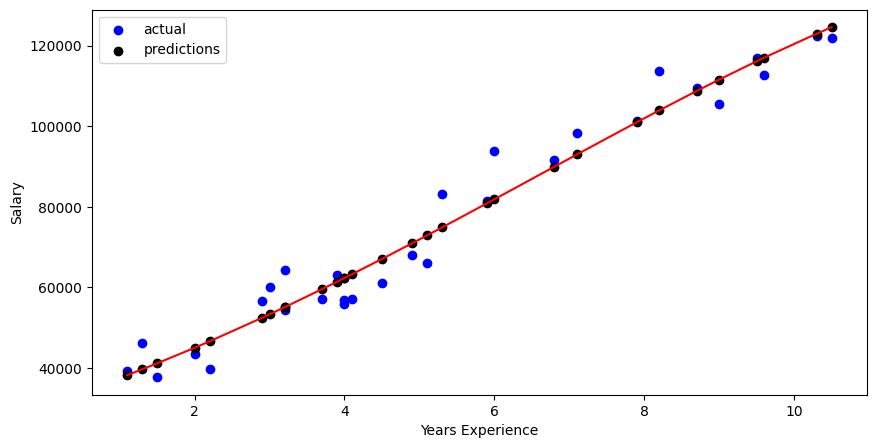

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(data.YearsExperience,data.Salary,color="blue",label="actual")
plt.scatter(data.YearsExperience,np.exp(model_val.predict()),color="black",label="predictions")
plt.plot(data.YearsExperience,np.exp(model_val.predict()),color="red")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.legend(loc="best")
plt.show()